In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("budgeting_dataset.csv")


In [4]:
df.head()

,UserID,Income,HousingExpense,TransportationExpense,FoodExpense,UtilitiesExpense,EntertainmentExpense,Savings,HousingBudget,TransportationBudget,FoodBudget,UtilitiesBudget,EntertainmentBudget,SavingsBudget
0,1,10993,2199,364,2046,827,415,442,34.943588,5.784205,32.512315,13.141586,6.594629,7.023677
1,2,9723,1962,471,2569,993,409,684,27.680587,6.645034,36.244357,14.009594,5.770316,9.650113
2,3,11295,1529,341,2793,1003,140,528,24.139564,5.383644,44.095358,15.835175,2.210294,8.335965
3,4,13046,1176,438,3943,1094,433,726,15.057618,5.608195,50.486556,14.007682,5.544174,9.295775
4,5,9531,1849,121,3278,726,646,892,24.613951,1.610756,43.636848,9.664537,8.599574,11.874334


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 1000 non-null   int64  
 1   Income                 1000 non-null   int64  
 2   HousingExpense         1000 non-null   int64  
 3   TransportationExpense  1000 non-null   int64  
 4   FoodExpense            1000 non-null   int64  
 5   UtilitiesExpense       1000 non-null   int64  
 6   EntertainmentExpense   1000 non-null   int64  
 7   Savings                1000 non-null   int64  
 8   HousingBudget          1000 non-null   float64
 9   TransportationBudget   1000 non-null   float64
 10  FoodBudget             1000 non-null   float64
 11  UtilitiesBudget        1000 non-null   float64
 12  EntertainmentBudget    1000 non-null   float64
 13  SavingsBudget          1000 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 109.5 KB


In [6]:
# Change the budgeting col so instead of a percentage they are the actual amount in relation to their income
df['HousingBudgetAmount'] = df['Income'] * (df['HousingBudget'] / 100)
df['TransportationBudgetAmount'] = df['Income'] * (df['TransportationBudget'] / 100)
df['FoodBudgetAmount'] = df['Income'] * (df['FoodBudget'] / 100)
df['UtilitiesBudgetAmount'] = df['Income'] * (df['UtilitiesBudget'] / 100)
df['EntertainmentBudgetAmount'] = df['Income'] * (df['EntertainmentBudget'] / 100)

In [7]:
df.head()

,UserID,Income,HousingExpense,TransportationExpense,FoodExpense,UtilitiesExpense,EntertainmentExpense,Savings,HousingBudget,TransportationBudget,FoodBudget,UtilitiesBudget,EntertainmentBudget,SavingsBudget,HousingBudgetAmount,TransportationBudgetAmount,FoodBudgetAmount,UtilitiesBudgetAmount,EntertainmentBudgetAmount
0,1,10993,2199,364,2046,827,415,442,34.943588,5.784205,32.512315,13.141586,6.594629,7.023677,3841.348641,635.857620,3574.078818,1444.654537,724.947561
1,2,9723,1962,471,2569,993,409,684,27.680587,6.645034,36.244357,14.009594,5.770316,9.650113,2691.383465,646.096642,3524.038798,1362.152793,561.047827
2,3,11295,1529,341,2793,1003,140,528,24.139564,5.383644,44.095358,15.835175,2.210294,8.335965,2726.563783,608.082570,4980.570729,1788.583044,249.652668
3,4,13046,1176,438,3943,1094,433,726,15.057618,5.608195,50.486556,14.007682,5.544174,9.295775,1964.416901,731.645070,6586.476057,1827.442254,723.292958
4,5,9531,1849,121,3278,726,646,892,24.613951,1.610756,43.636848,9.664537,8.599574,11.874334,2345.955671,153.521166,4159.027955,921.126997,819.625399


# Data Visualization

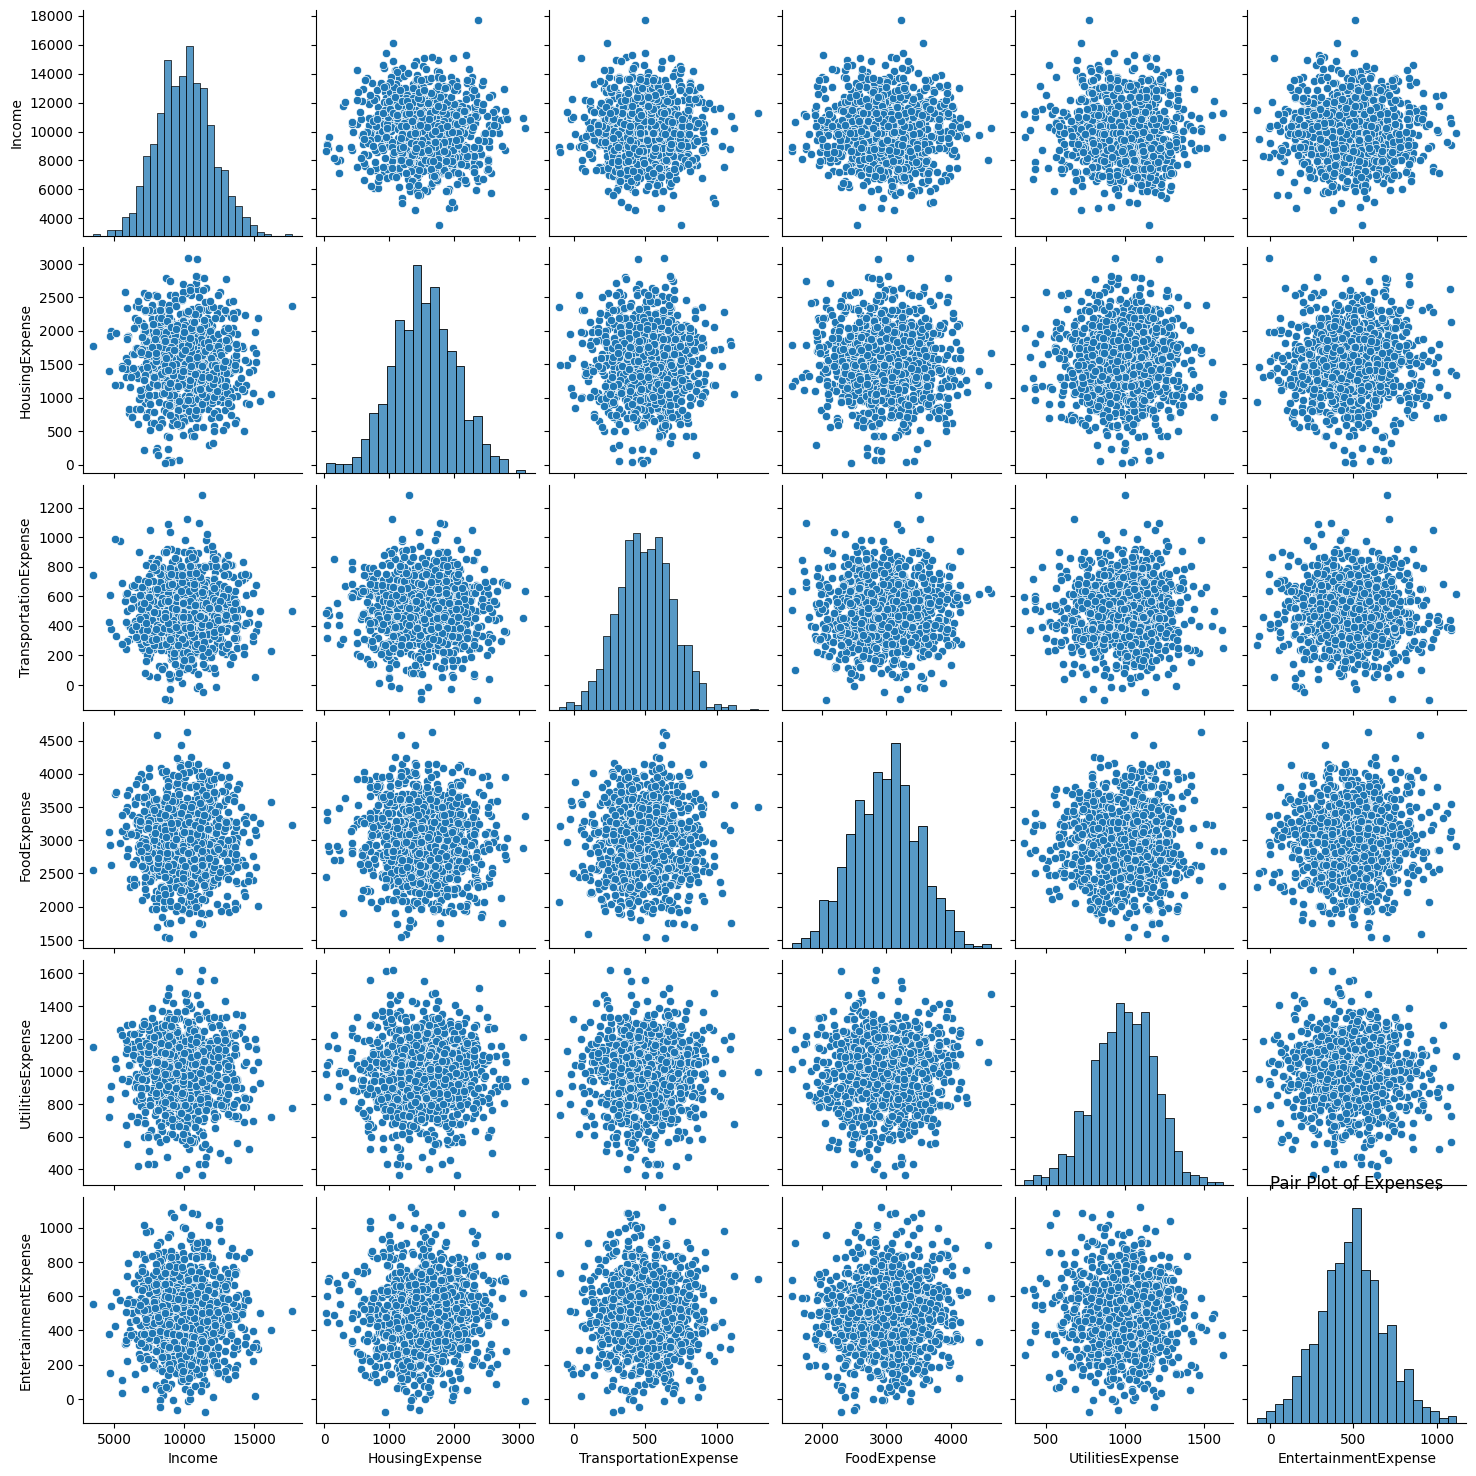

In [47]:
# 1. Pair Plot
sns.pairplot(df[['Income', 'HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']])
plt.title("Pair Plot of Expenses")
plt.show()

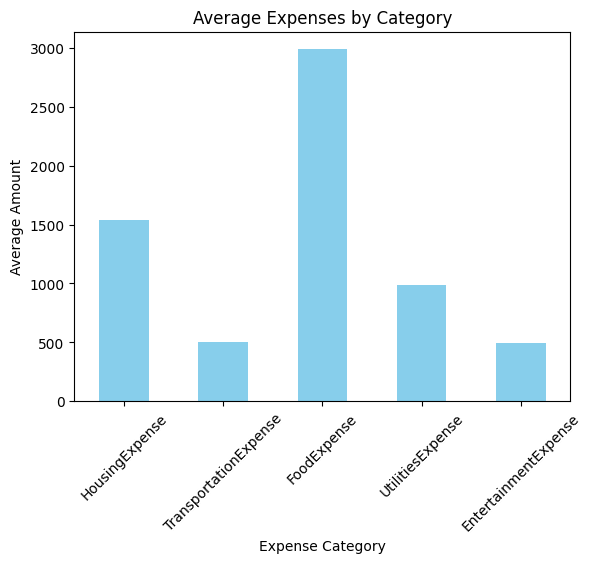

In [48]:
# 3. Bar Chart of Average Expenses by Category
average_expenses = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']].mean()
average_expenses.plot(kind='bar', color='skyblue')
plt.title("Average Expenses by Category")
plt.ylabel("Average Amount")
plt.xlabel("Expense Category")
plt.xticks(rotation=45)
plt.show()

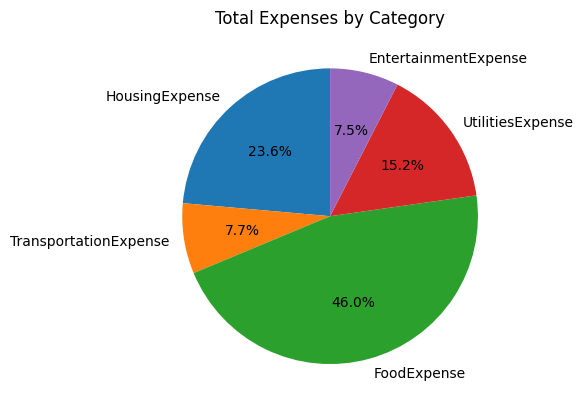

In [49]:
# 4. Pie Chart of Total Expenses by Category
explode = (0, 0, 0, 0, 0)  # explode 1st slice
average_expenses.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Total Expenses by Category")
plt.ylabel("")  # Hide the y-label
plt.show()

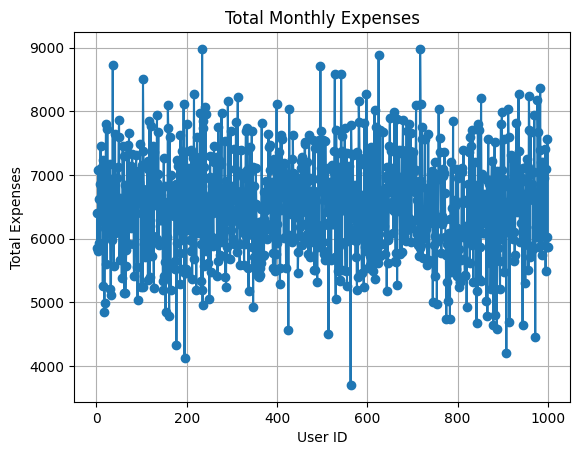

In [50]:
# 5. Line Plot of Total Monthly Expenses
total_monthly_expenses = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']].sum(axis=1)
plt.plot(df['UserID'], total_monthly_expenses, marker='o')
plt.title("Total Monthly Expenses")
plt.xlabel("User ID")
plt.ylabel("Total Expenses")
plt.grid()
plt.show()

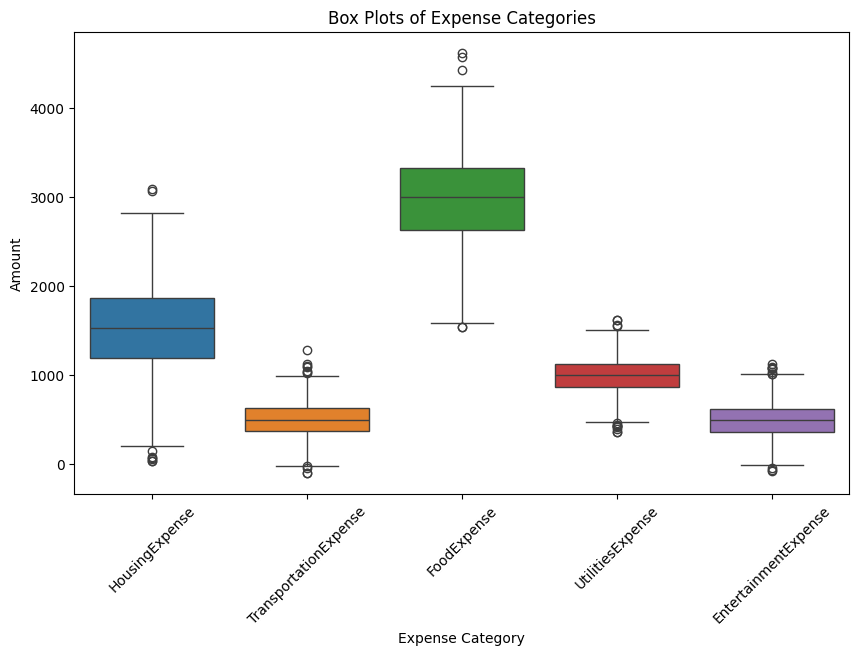

In [51]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']])
plt.title("Box Plots of Expense Categories")
plt.ylabel("Amount")
plt.xlabel("Expense Category")
plt.xticks(rotation=45)
plt.show()


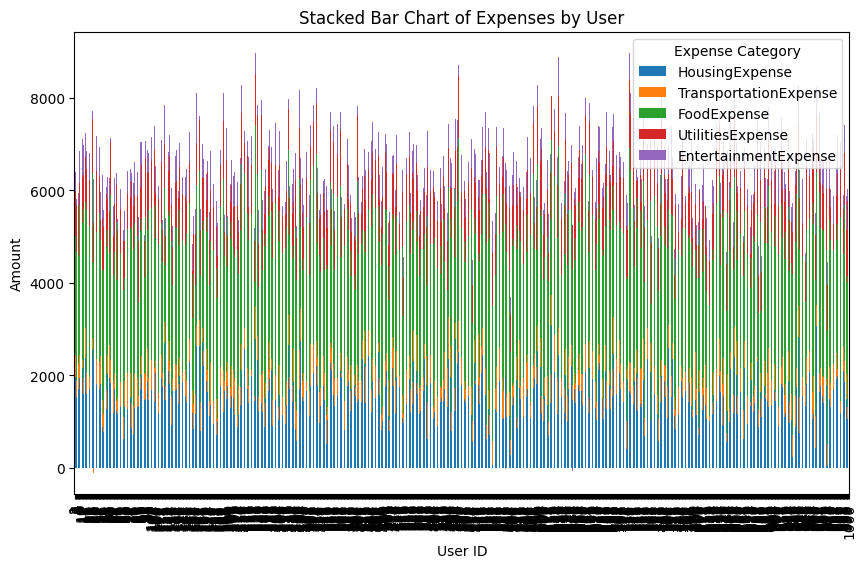

In [52]:
# Stacked bar chart
df[['UserID', 'HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']].set_index('UserID').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Stacked Bar Chart of Expenses by User")
plt.ylabel("Amount")
plt.xlabel("User ID")
plt.legend(title="Expense Category")
plt.show()

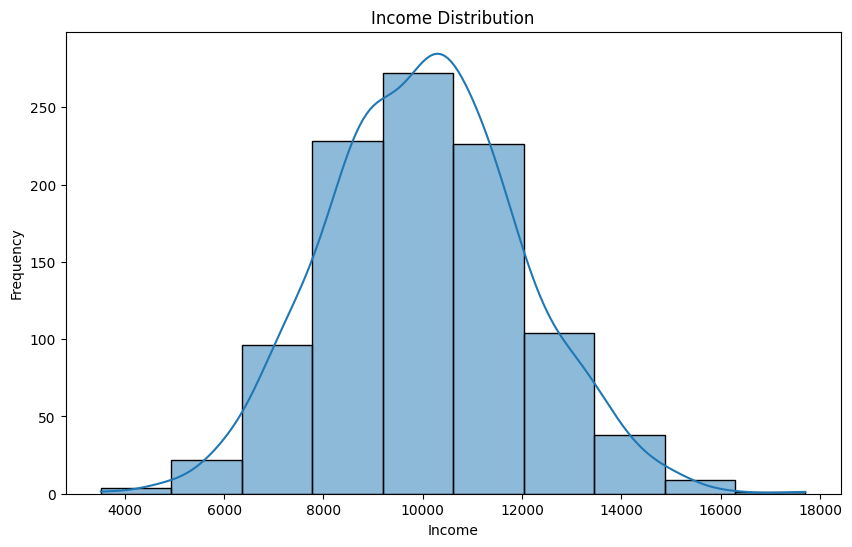

In [53]:
# Histogram of income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=10, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


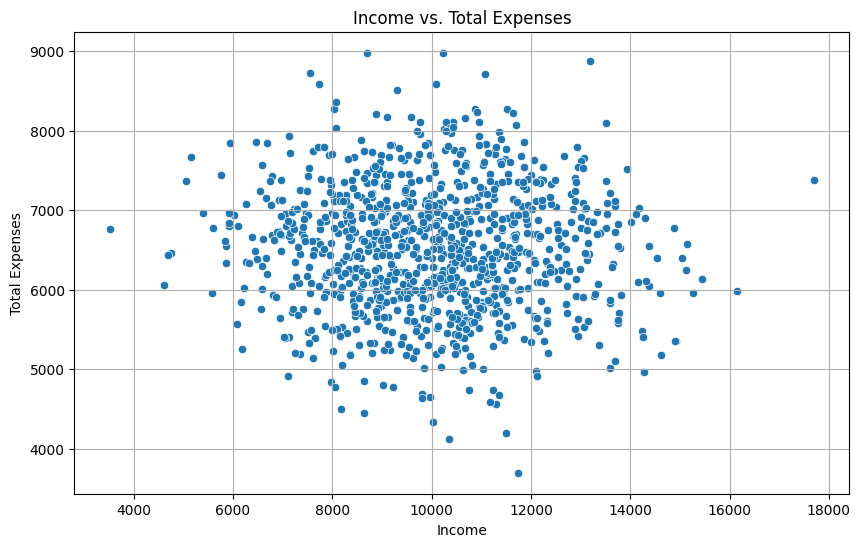

In [54]:
# Scatter plot of income vs total expenses
df['TotalExpenses'] = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalExpenses', data=df)
plt.title("Income vs. Total Expenses")
plt.xlabel("Income")
plt.ylabel("Total Expenses")
plt.grid()
plt.show()


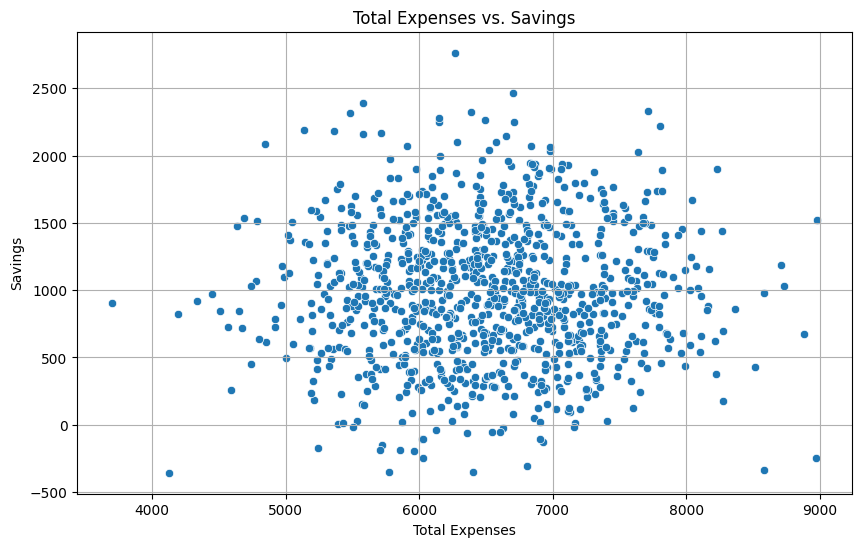

In [55]:
# Scatter plot of total expenses vs savings
df['TotalExpenses'] = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalExpenses', y='Savings', data=df)
plt.title("Total Expenses vs. Savings")
plt.xlabel("Total Expenses")
plt.ylabel("Savings")
plt.grid()
plt.show()


# ------------------------------------------------------

In [8]:
# Calculate mean values for plotting
budgeted_expenses = df[['HousingBudgetAmount', 'TransportationBudgetAmount', 'FoodBudgetAmount', 'UtilitiesBudgetAmount', 'EntertainmentBudgetAmount']].mean()
actual_expenses = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']].mean()

# Combine into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Budgeted': budgeted_expenses,
    'Actual': actual_expenses
})

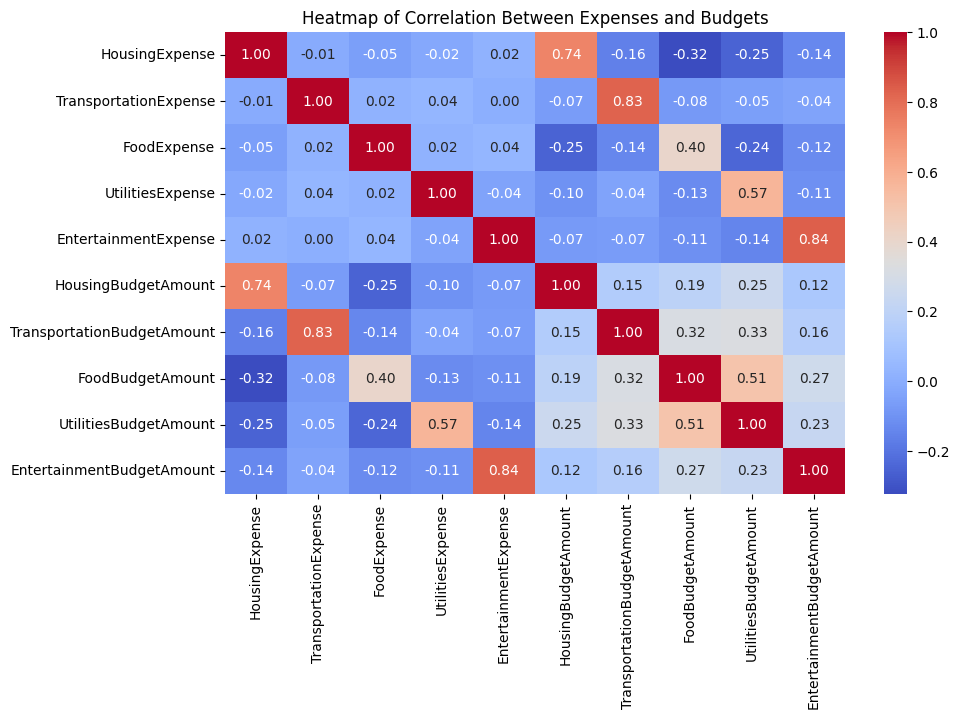

In [57]:
# Heatmap of Correlation Between Expenses and Budget
# Prepare correlation data
correlation_data = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense', 
                        'HousingBudgetAmount', 'TransportationBudgetAmount', 'FoodBudgetAmount', 
                        'UtilitiesBudgetAmount', 'EntertainmentBudgetAmount']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation Between Expenses and Budgets")
plt.show()


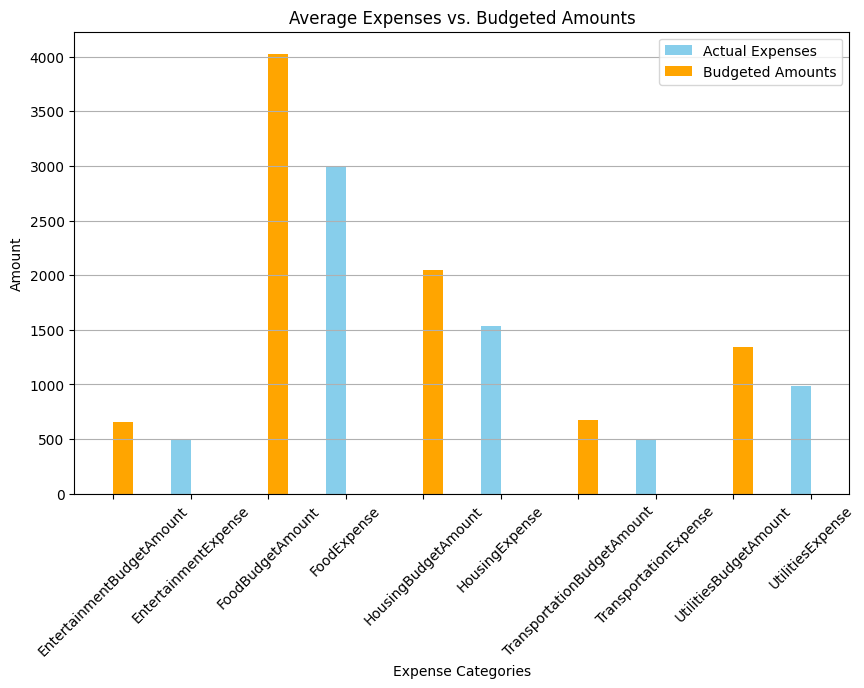

In [58]:
# 3. Bar Chart of Average Expenses by Category with Budget Comparison
# Calculate average expenses
average_expenses = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']].mean()

# Combine averages into a single DataFrame
avg_comparison_df = pd.DataFrame({
    'Actual Expenses': average_expenses,
    'Budgeted Amounts': budgeted_expenses
})

# Bar Chart
avg_comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Average Expenses vs. Budgeted Amounts")
plt.ylabel("Amount")
plt.xlabel("Expense Categories")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


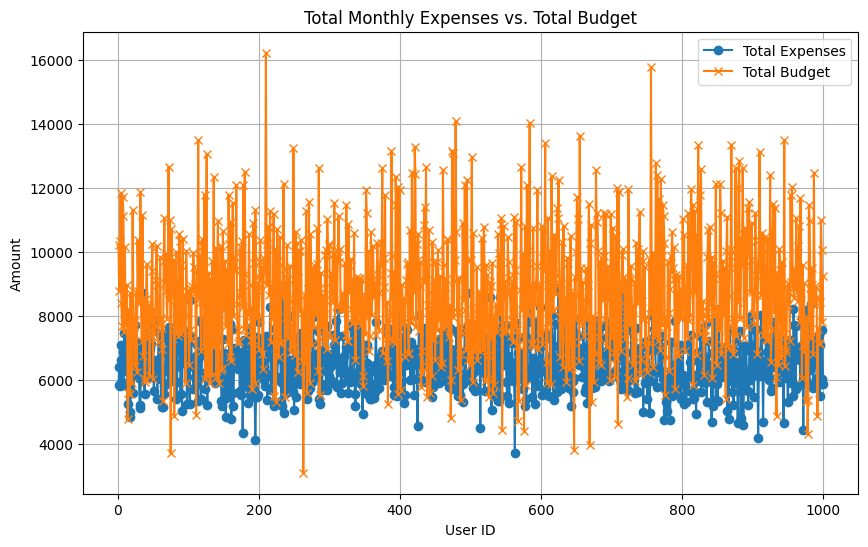

In [59]:
# 5. Line Plot of Total Monthly Expenses vs. Total Budget

# Assuming 'Month' is a column in your DataFrame for monthly data
# Calculate total monthly expenses and budgets
df['TotalExpenses'] = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']].sum(axis=1)
df['TotalBudget'] = df[['HousingBudgetAmount', 'TransportationBudgetAmount', 'FoodBudgetAmount', 'UtilitiesBudgetAmount', 'EntertainmentBudgetAmount']].sum(axis=1)

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['UserID'], df['TotalExpenses'], label='Total Expenses', marker='o')
plt.plot(df['UserID'], df['TotalBudget'], label='Total Budget', marker='x')
plt.title("Total Monthly Expenses vs. Total Budget")
plt.xlabel("User ID")
plt.ylabel("Amount")
plt.legend()
plt.grid()
plt.show()


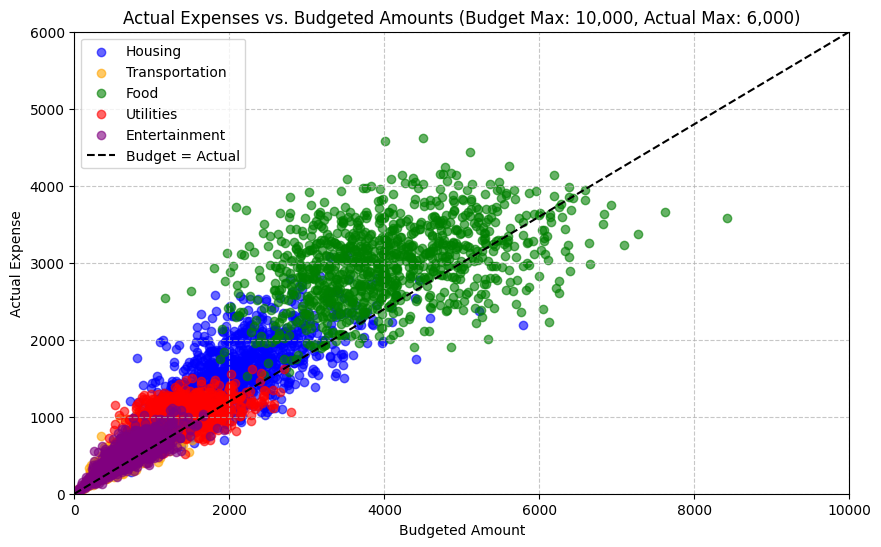

In [60]:
# Scatter Plot of Actual vs. Budgeted
plt.figure(figsize=(10, 6))

# Set transparency for better visibility of overlapping points
plt.scatter(df['HousingBudgetAmount'], df['HousingExpense'], color='blue', alpha=0.6, label='Housing')
plt.scatter(df['TransportationBudgetAmount'], df['TransportationExpense'], color='orange', alpha=0.6, label='Transportation')
plt.scatter(df['FoodBudgetAmount'], df['FoodExpense'], color='green', alpha=0.6, label='Food')
plt.scatter(df['UtilitiesBudgetAmount'], df['UtilitiesExpense'], color='red', alpha=0.6, label='Utilities')
plt.scatter(df['EntertainmentBudgetAmount'], df['EntertainmentExpense'], color='purple', alpha=0.6, label='Entertainment')

# Diagonal line for budget vs. actual comparison
plt.plot([0, 10000], [0, 6000], 'k--', label='Budget = Actual')  # Diagonal line with specified limits
plt.xlim(0, 10000)  # Limit x-axis to 10,000
plt.ylim(0, 6000)   # Limit y-axis to 6,000

# Title and labels
plt.title("Actual Expenses vs. Budgeted Amounts (Budget Max: 10,000, Actual Max: 6,000)")
plt.xlabel("Budgeted Amount")
plt.ylabel("Actual Expense")

# Enhanced legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


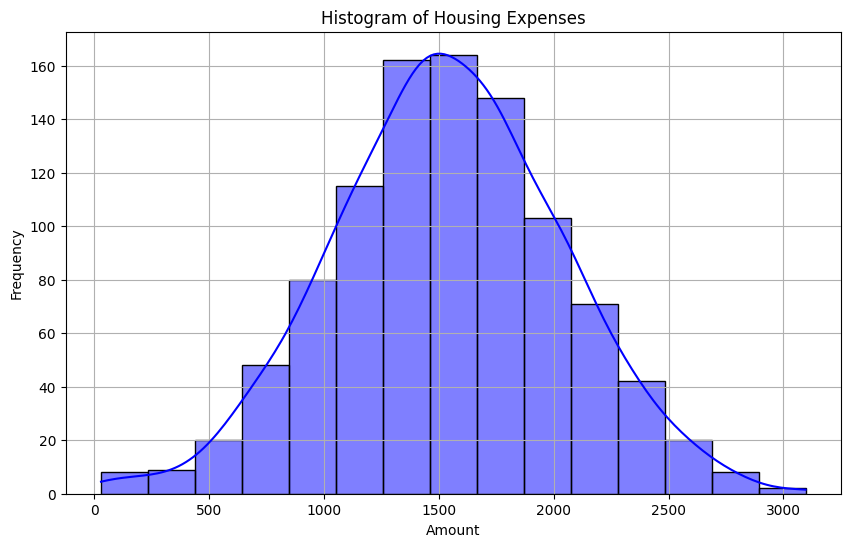

In [61]:
# Histogram of expenses
# Histogram of Housing Expenses
plt.figure(figsize=(10, 6))
sns.histplot(df['HousingExpense'], bins=15, kde=True, color='blue')
plt.title("Histogram of Housing Expenses")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()


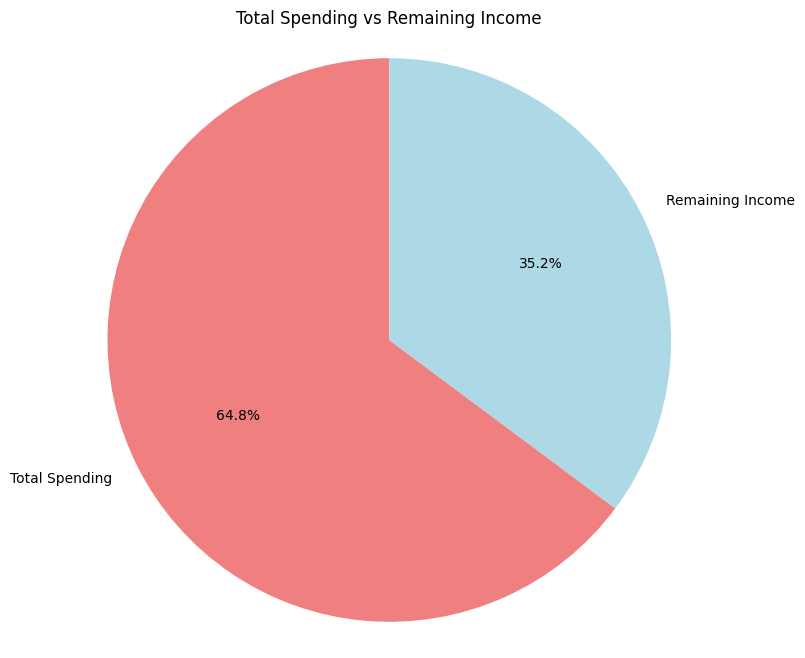

In [62]:
# Comparison of total spending vs total income
# Calculate total spending and income
total_spent = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 
                   'UtilitiesExpense', 'EntertainmentExpense']].sum().sum()
total_income = df['Income'].sum()

# Pie Chart of Spending vs Income
labels = ['Total Spending', 'Remaining Income']
sizes = [total_spent, total_income - total_spent]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title("Total Spending vs Remaining Income")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


# K Means Clustering

In [9]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Step 1: Load your dataset
df = pd.read_csv("budgeting_dataset.csv")

# Step 2: Calculate Total Expenses
df['TotalExpenses'] = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 
                            'UtilitiesExpense', 'EntertainmentExpense']].sum(axis=1)

# Step 3: Prepare data for clustering (you can scale if necessary)
scaler = StandardScaler()
scaled_expenses = scaler.fit_transform(df[['TotalExpenses']])

# Step 4: Train KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
df['SpendingCategory'] = kmeans.fit_predict(scaled_expenses)

# Step 5: Check unique labels
unique_labels = set(kmeans.labels_)
print(f"Unique labels: {unique_labels}")

# Step 6: Create a mapping for categories
category_mapping = {
    0: 'Frugal',   # Example mapping
    1: 'Average',  # Example mapping
    2: 'Spender'   # Example mapping
}

# Step 7: Map spending categories
df['SpendingCategory'] = df['SpendingCategory'].map(category_mapping)

# Step 8: Display results
print(df[['UserID', 'TotalExpenses', 'SpendingCategory']].head())


Unique labels: {np.int32(0), np.int32(1), np.int32(2)}
   UserID  TotalExpenses SpendingCategory
0       1           5851          Average
1       2           6404          Spender
2       3           5806          Average
3       4           7084           Frugal
4       5           6620          Spender


# KNN 

In [11]:
# Change the budgeting col so instead of a percentage they are the actual amount in relation to their income
df['HousingBudgetAmount'] = df['Income'] * (df['HousingBudget'] / 100)
df['TransportationBudgetAmount'] = df['Income'] * (df['TransportationBudget'] / 100)
df['FoodBudgetAmount'] = df['Income'] * (df['FoodBudget'] / 100)
df['UtilitiesBudgetAmount'] = df['Income'] * (df['UtilitiesBudget'] / 100)
df['EntertainmentBudgetAmount'] = df['Income'] * (df['EntertainmentBudget'] / 100)

Best k value: 20
Best mean squared error: 229090.464159375


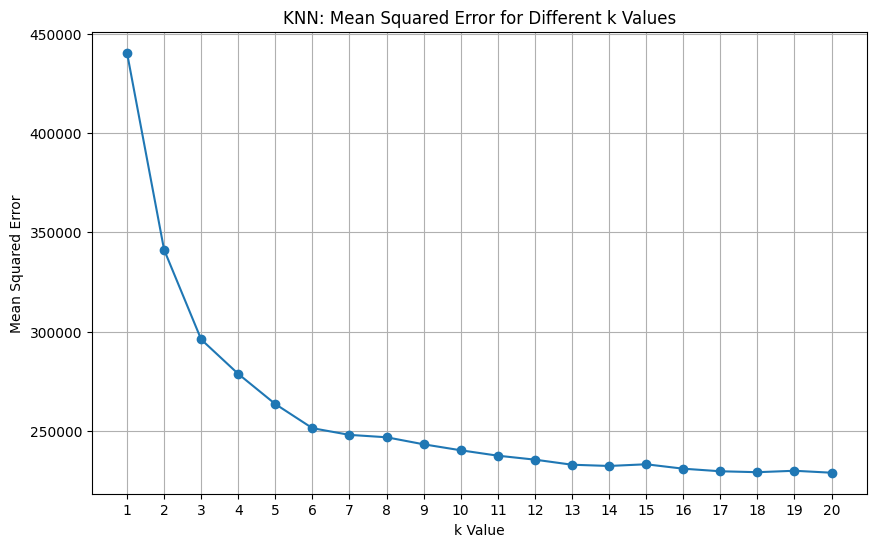

Predicted Housing Expense: 1837.55
Predicted TransportationExpense: 527.3
Predicted FoodExpense: 2874.55
Predicted UtilitiesExpense: 1096.0
Predicted EntertainmentExpense: 429.5


c:\Users\ggind\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ggind\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ggind\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ggind\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ggind\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler wa

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np


# Features: All budgeted amounts
X = df[['TransportationBudgetAmount', 'FoodBudgetAmount', 'UtilitiesBudgetAmount', 'EntertainmentBudgetAmount']]
y_housing = df['HousingExpense']

# Initialize a list to store the mean scores for different k values
k_values = range(1, 21)  # Test k values from 1 to 20
mean_scores = []

# Loop through different k values
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train_housing, y_test_housing = train_test_split(X, y_housing, test_size=0.2, random_state=42)
    
    # Standardize the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Perform cross-validation
    scores = cross_val_score(knn_model, X_train_scaled, y_train_housing, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(-scores))  # Store the mean of the negative MSE

# Find the best k value based on minimum mean squared error
best_k = k_values[np.argmin(mean_scores)]
best_score = min(mean_scores)

# Print the results
print(f"Best k value: {best_k}")
print(f"Best mean squared error: {best_score}")

# Plot the results for better visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.title("KNN: Mean Squared Error for Different k Values")
plt.xlabel("k Value")
plt.ylabel("Mean Squared Error")
plt.xticks(k_values)
plt.grid()
plt.show()

# Now train the final model using the best k
knn_model_final = KNeighborsRegressor(n_neighbors=best_k)
# Fit on the entire dataset for final model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn_model_final.fit(X_scaled, y_housing)

# User input for predictions (example)
user_input = [[450, 1700, 900, 300]]  # Transportation, Food, Utilities, Entertainment
user_input_scaled = scaler.transform(user_input)

# Predict future housing expense based on user input
predicted_housing = knn_model_final.predict(user_input_scaled)
print(f"Predicted Housing Expense: {predicted_housing[0]}")

# Define a function to predict expenses for different categories
def predict_expenses(user_input):
    expenses = {}
    
    for expense_category in ['TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']:
        y_target = df[expense_category]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        knn_model = KNeighborsRegressor(n_neighbors=best_k)
        knn_model.fit(X_train_scaled, y_train)
        
        user_input_scaled = scaler.transform(user_input)
        predicted_expense = knn_model.predict(user_input_scaled)
        
        expenses[expense_category] = predicted_expense[0]
        
    return expenses

# Get predictions for all categories 
predicted_expenses = predict_expenses(user_input)
for category, amount in predicted_expenses.items():
    print(f"Predicted {category}: {amount}")


# GUI

In [13]:
import tkinter as tk
from tkinter import messagebox

In [14]:
# Function to classify spending category
def classify_spending_category(user_input):
    df['TotalExpenses'] = df[['HousingExpense', 'TransportationExpense', 'FoodExpense', 
                                'UtilitiesExpense', 'EntertainmentExpense']].sum(axis=1)
    
    scaler = StandardScaler()
    scaled_expenses = scaler.fit_transform(df[['TotalExpenses']])
    
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['SpendingCategory'] = kmeans.fit_predict(scaled_expenses)
    
    category_mapping = {0: 'Frugal', 1: 'Average', 2: 'Spender'}
    df['SpendingCategory'] = df['SpendingCategory'].map(category_mapping)

    # Scale the user input for prediction
    user_input_scaled = scaler.transform(user_input)

    # Predict spending category for the user input
    category_prediction = kmeans.predict(user_input_scaled)
    return category_mapping[category_prediction[0]]


In [15]:

# Function to predict future expenses
def predict_expenses(user_input):
    expenses = {}
    
    # Predict housing expense
    y_housing = df['HousingExpense']
    X = df[['TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']]
    
    # Using actual expenses for KNN
    X_train, X_test, y_train_housing, y_test_housing = train_test_split(X, y_housing, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    knn_model = KNeighborsRegressor(n_neighbors=3)
    knn_model.fit(X_train_scaled, y_train_housing)
    
    user_input_scaled = scaler.transform(user_input)
    predicted_housing = knn_model.predict(user_input_scaled)[0]
    expenses['HousingExpense'] = predicted_housing
    
    # Predict other expenses
    for expense_category in ['TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense']:
        y_target = df[expense_category]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        knn_model = KNeighborsRegressor(n_neighbors=3)
        knn_model.fit(X_train_scaled, y_train)
        
        predicted_expense = knn_model.predict(user_input_scaled)
        expenses[expense_category] = predicted_expense[0]
        
    return expenses

In [16]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def plot_budget_pie_chart(income, housing, food, transportation, utilities, entertainment):
    # Calculate total expenses and savings
    total_expenses = housing + food + transportation + utilities + entertainment
    savings = income - total_expenses

    # Create a pie chart
    labels = ['Savings', 'Housing', 'Food', 'Transportation', 'Utilities', 'Entertainment']
    sizes = [savings, housing, food, transportation, utilities, entertainment]
    colors = ['#ffcc99', '#ff9999', '#66b3ff', '#99ff99', '#800080', '#c2c2f0']  # Custom colors for each category
    
    fig = Figure(figsize=(5, 4), dpi=100)
    ax = fig.add_subplot(111)

    # Function to format the percentage display
    def func(pct, allvalues):
        absolute = int(pct / 100. * sum(allvalues))  # Calculate absolute value
        return f'{absolute} ({pct:.1f}%)'
    
    wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=lambda pct: func(pct, sizes), startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

    # Create a legend to the left of the pie chart
    ax.legend(wedges, labels, title="Budget Categories", loc="center left", bbox_to_anchor=(-0.45, 0.5), fontsize='small')

    # Adjust the position of the pie chart
    ax.set_position([0.3, 0.1, 0.6, 0.8])  # Adjust left margin to move pie chart to the right

    # Create a canvas to display the chart
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()


In [20]:
# Function to visualize budget
def visualize_budget():
    try:
        # Retrieve inputs
        income = float(entry_income.get())
        housing = float(entry_housing.get())
        food = float(entry_food.get())
        transportation = float(entry_transportation.get())
        utilities = float(entry_utilities.get())
        entertainment = float(entry_entertainment.get())

        total_expenses = housing + food + transportation + utilities + entertainment
        savings = income - total_expenses

        # Create a pie chart of the budget
        plot_budget_pie_chart(income, housing, food, transportation, utilities, entertainment)
        
        messagebox.showinfo("Savings", f"Total Savings: ${savings:.2f}")

        # Convert user input to DataFrame for scaling
        user_input = pd.DataFrame([[transportation, food, utilities, entertainment]], 
                                   columns=['TransportationExpense', 'FoodExpense', 'UtilitiesExpense', 'EntertainmentExpense'])

        # Predict future expenses
        predicted_expenses = predict_expenses(user_input)

        predicted_messages = "\n".join([f"Predicted Housing Expense: ${predicted_expenses['HousingExpense']:.2f}"] +
                                         [f"Predicted {cat}: ${amount:.2f}" 
                                          for cat, amount in predicted_expenses.items() if cat != 'HousingExpense'])
        messagebox.showinfo("Predicted Expenses", predicted_messages)

        # Classify spending category
        spending_category = classify_spending_category([[total_expenses]])  # Pass total expenses as input for classification
        messagebox.showinfo("Spending Category", f"You belong to Spending Category: {spending_category}")



    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers.")


In [21]:
# Set up the main window
root = tk.Tk()
root.title("Budgeting App")

# Set the window size (width x height)
#root.geometry("600x900")
root.configure(bg='#f0f0f0')  # Light grey background

# Create a frame for better organization
frame = tk.Frame(root, bg='#ffffff', padx=20, pady=20)
frame.pack(padx=10, pady=10, fill='both', expand=True)

# Header label
header_label = tk.Label(frame, text="Budgeting Tool", font=('Helvetica', 16, 'bold'), bg='#ffffff')
header_label.pack(pady=(0, 20))

# Input fields
tk.Label(frame, text="Monthly Income:", font=('Helvetica', 12), bg='#ffffff').pack(anchor='w')
entry_income = tk.Entry(frame, font=('Helvetica', 12), bg='#e0e0e0', bd=2)
entry_income.pack(pady=(0, 10), fill='x')

tk.Label(frame, text="Housing Expense:", font=('Helvetica', 12), bg='#ffffff').pack(anchor='w')
entry_housing = tk.Entry(frame, font=('Helvetica', 12), bg='#e0e0e0', bd=2)
entry_housing.pack(pady=(0, 10), fill='x')

tk.Label(frame, text="Food Expense:", font=('Helvetica', 12), bg='#ffffff').pack(anchor='w')
entry_food = tk.Entry(frame, font=('Helvetica', 12), bg='#e0e0e0', bd=2)
entry_food.pack(pady=(0, 10), fill='x')

tk.Label(frame, text="Transportation Expense:", font=('Helvetica', 12), bg='#ffffff').pack(anchor='w')
entry_transportation = tk.Entry(frame, font=('Helvetica', 12), bg='#e0e0e0', bd=2)
entry_transportation.pack(pady=(0, 10), fill='x')

tk.Label(frame, text="Utilities Expense:", font=('Helvetica', 12), bg='#ffffff').pack(anchor='w')
entry_utilities = tk.Entry(frame, font=('Helvetica', 12), bg='#e0e0e0', bd=2)
entry_utilities.pack(pady=(0, 10), fill='x')

tk.Label(frame, text="Entertainment Expense:", font=('Helvetica', 12), bg='#ffffff').pack(anchor='w')
entry_entertainment = tk.Entry(frame, font=('Helvetica', 12), bg='#e0e0e0', bd=2)
entry_entertainment.pack(pady=(0, 30), fill='x')

# Visualize button
visualize_button = tk.Button(frame, text="Visualize Budget", command=visualize_budget, font=('Helvetica', 12), bg='#4CAF50', fg='white', 
                             relief='raised', padx=10, pady=5)
visualize_button.pack()



# Start the GUI event loop
root.mainloop()


c:\Users\ggind\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
